<a href="https://colab.research.google.com/github/Nahid1970/Assignment-1-Datascience/blob/main/Activity_detection_(Resnet%20%26%20VGG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#locations setting for training and test datasets
train_data='/content/drive/MyDrive/Activity/Images/0'
test_data='/content/drive/MyDrive/Activity/Testing/0'

In [ ]:
from tqdm import tqdm
import os
from glob import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [ ]:
output=["Baseball","BasketBall" ,"Fighting","Football playing","Hospital","Eatting","Skating","walking","working"]
lebel=[]
output_lebel=[0,1,2,3,4,5,6,7,8]

In [ ]:
print(output[6])

Skating


In [ ]:
img_shape = (120, 120, 3)
train_dir="Images"
 
Name = "Model0"
df = []
lebel = []
rel_dirname = '/content/drive/MyDrive/Activity/Images'
    
for dirname in os.listdir(rel_dirname):
        print(dirname)
        for filename in glob(rel_dirname+'/'+dirname+'/*.png'):
             #print(filename)
             img = image.load_img((filename),target_size=img_shape)
             img = image.img_to_array(img)
             img = img/255.0
             df.append(img)
             lebel.append(dirname)
X = np.array(df)
lebel = np.array(lebel)
y = to_categorical(lebel)
print(X.shape)
print(y.shape)

0
1
2
3
4
5
6
7
8
(1697, 120, 120, 3)
(1697, 9)


In [ ]:
lebel

array(['0', '0', '0', ..., '8', '8', '8'], dtype='<U1')

In [ ]:
len(train_data)

40

In [ ]:
# splitting train set into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(y_train.shape)


(1357, 120, 120, 3)
(1357, 9)


In [ ]:
print(X_train.shape)

(1357, 120, 120, 3)


In [ ]:
#Building model 1 using customized convolutional and pooling layers

model = Sequential()

#input_shape is 100*100 since thats the dimension of each of the human images
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(120,120,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(9,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 16)      208       
                                                                 
 activation (Activation)     (None, 120, 120, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        8

In [ ]:
#importing ootimizers
import keras.optimizers
from tensorflow.keras.optimizers import Adam


optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# creating a file to save the trained CNN model 
checkpointer = ModelCheckpoint(filepath = '/content/drive/MyDrive/Activity', verbose = 1, save_best_only = True)

# fitting model using above defined layers 
CNN_model = model.fit(X_train,y_train,
        batch_size = 128,
        epochs=10,
        validation_data=(X_test, y_test),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 1.56921, saving model to /content/drive/MyDrive/Activity
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Activity/assets
11/11 - 19s - loss: 1.9259 - accuracy: 0.2786 - val_loss: 1.5692 - val_accuracy: 0.5941 - 19s/epoch - 2s/step
Epoch 2/10

Epoch 00002: val_loss improved from 1.56921 to 0.88191, saving model to /content/drive/MyDrive/Activity
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Activity/assets
11/11 - 17s - loss: 1.3432 - accuracy: 0.5770 - val_loss: 0.8819 - val_accuracy: 0.7647 - 17s/epoch - 2s/step
Epoch 3/10

Epoch 00003: val_loss improved from 0.88191 to 0.48531, saving model to /content/drive/MyDrive/Activity
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Activity/assets
11/11 - 17s - loss: 0.8094 - accuracy: 0.7716 - val_loss: 0.4853 - val_accuracy: 0.8471 - 17s/epoch - 2s/step
Epoch 4/10

Epoch 00004: val_loss improved from 0.48531 to 0.32081, saving model to /content/drive/MyDri

In [ ]:
#checking testset accuracy

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

11/11 [==============================] - 1s 108ms/step - loss: 0.0746 - accuracy: 0.9765
Test accuracy: 0.9764705896377563


In [ ]:
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives

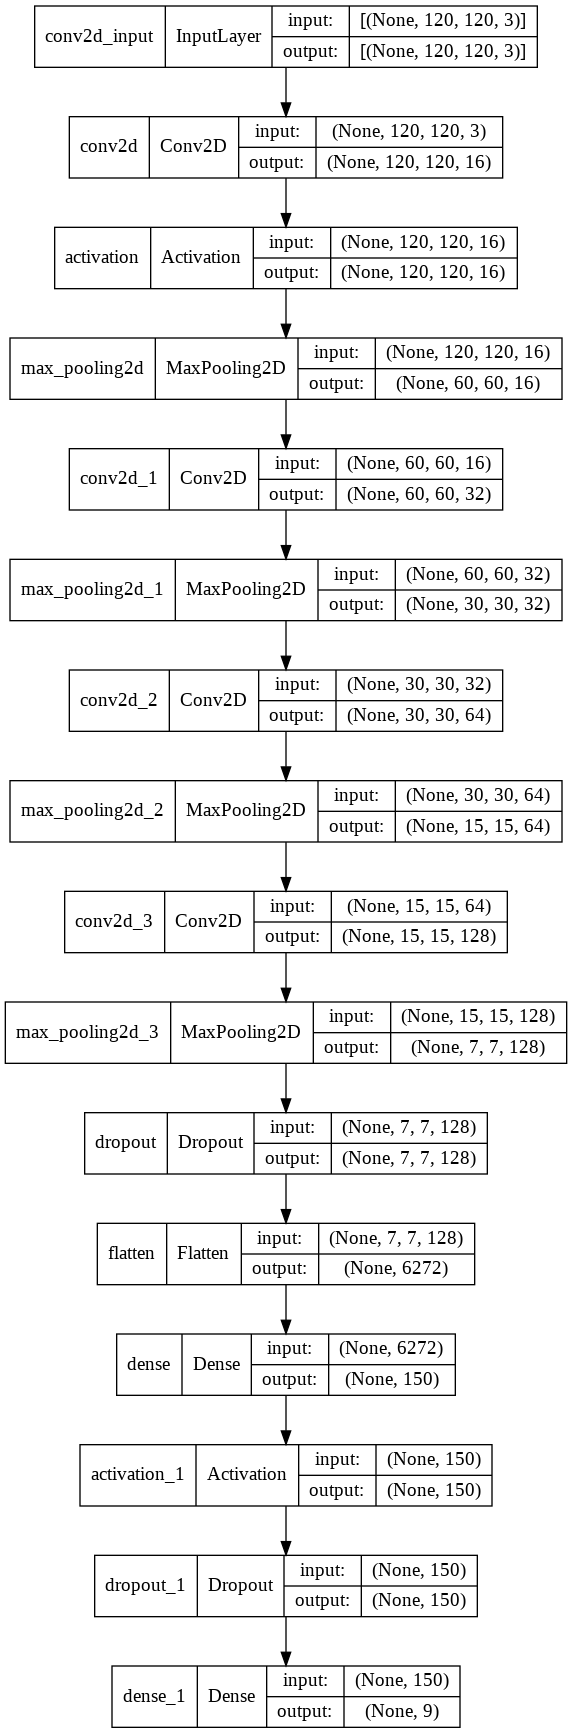

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="myModel.png", show_shapes=True, show_layer_names=True)

In [ ]:
#from tensorflow.keras.metrics import ision,AUC,TruePositives,TrueNeRecall,Precgatives,FalseNegatives,FalsePositives

In [ ]:
!pip install activation

In [ ]:
from tensorflow.python.keras import activations

In [ ]:
#importing ootimizers
import keras.optimizers
#from activation.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam


optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])



In [ ]:
# creating a file to save the trained CNN model 
checkpointer = ModelCheckpoint(filepath = '/content/drive/MyDrive/Activity', verbose = 1, save_best_only = True)

# fitting model using above defined layers 
CNN_model = model.fit(X_train,y_train,
        batch_size = 128,
        epochs=10,
        validation_data=(X_test, y_test),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.16726, saving model to /content/drive/MyDrive/Activity
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Activity/assets
11/11 - 21s - loss: 0.2885 - acc: 0.9256 - recall: 0.9042 - precision: 0.9381 - auc: 0.9898 - true_positives: 1227.0000 - true_negatives: 10775.0000 - false_negatives: 130.0000 - false_positives: 81.0000 - val_loss: 0.1673 - val_acc: 0.9647 - val_recall: 0.9294 - val_precision: 0.9783 - val_auc: 0.9987 - val_true_positives: 316.0000 - val_true_negatives: 2713.0000 - val_false_negatives: 24.0000 - val_false_positives: 7.0000 - 21s/epoch - 2s/step
Epoch 2/10

Epoch 00002: val_loss improved from 0.16726 to 0.09818, saving model to /content/drive/MyDrive/Activity
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Activity/assets
11/11 - 18s - loss: 0.1330 - acc: 0.9624 - recall: 0.9440 - precision: 0.9756 - auc: 0.9991 - true_positives: 1281.0000 - true_negatives: 10824.0000 - false_negatives: 76.000

In [ ]:
pd.DataFrame.from_dict(CNN_model.history).to_csv('/content/drive/MyDrive/Activity/CNN_history.csv',index=False)

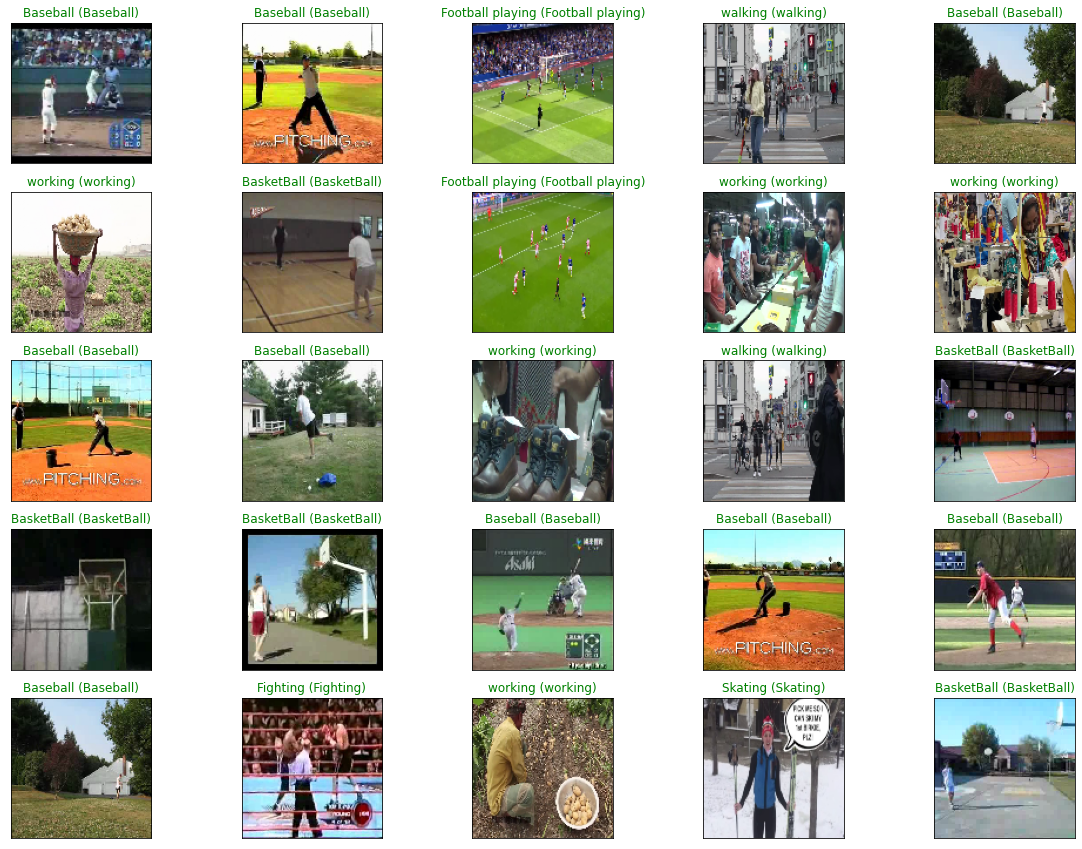

In [ ]:
# using model to predict on test data
y_pred = model.predict(X_test)

# Lets plot the predictions of different human activity and check their original labels

fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[2], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(output[pred_idx], output[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
history_dict = CNN_model.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'recall', 'precision', 'auc', 'true_positives', 'true_negatives', 'false_negatives', 'false_positives', 'val_loss', 'val_acc', 'val_recall', 'val_precision', 'val_auc', 'val_true_positives', 'val_true_negatives', 'val_false_negatives', 'val_false_positives'])


In [ ]:
acc = CNN_model.history['acc']
val_acc = CNN_model.history['val_acc']

loss = CNN_model.history['loss']
val_loss = CNN_model.history['val_loss']

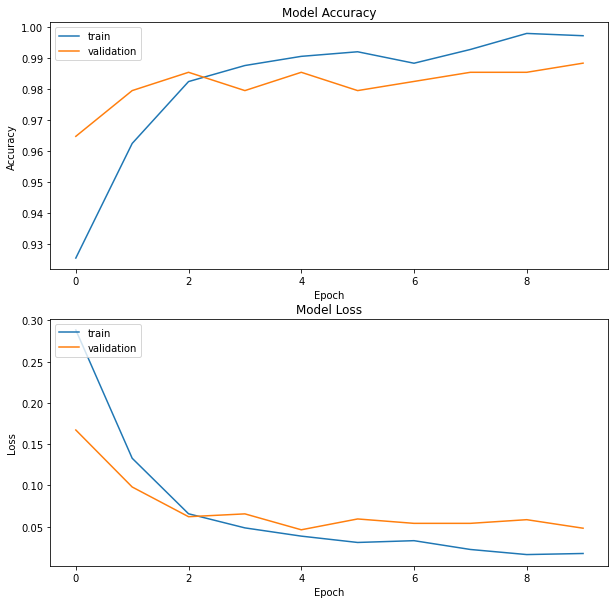

In [ ]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(CNN_model.history['acc'])  
plt.plot(CNN_model.history['val_acc'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(CNN_model.history['loss'])  
plt.plot(CNN_model.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
import seaborn as sns

**confusion_matrix**

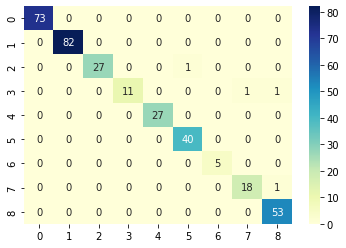

In [ ]:
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred,axis=-1)
t_true=np.argmax(y_test,axis=-1)
b=confusion_matrix(t_true, y_pred,labels=output_lebel)
sns.heatmap(b,annot=True,cmap="YlGnBu")


In [ ]:

y_pred

array([1, 0, 0, 0, 8, 8, 1, 8, 8, 2, 8, 1, 1, 0, 5, 7, 2, 5, 0, 1, 0, 0,
       1, 0, 8, 3, 5, 2, 1, 1, 8, 1, 6, 5, 4, 1, 8, 2, 1, 1, 0, 2, 1, 2,
       1, 3, 4, 5, 4, 0, 0, 1, 0, 0, 8, 4, 0, 8, 0, 8, 1, 1, 8, 1, 3, 2,
       7, 8, 7, 1, 1, 1, 1, 0, 1, 8, 1, 1, 4, 7, 0, 0, 7, 7, 5, 8, 3, 0,
       1, 0, 6, 7, 1, 3, 5, 0, 5, 1, 7, 1, 8, 8, 7, 8, 0, 1, 8, 0, 5, 1,
       3, 1, 0, 1, 7, 5, 8, 6, 3, 2, 8, 5, 1, 5, 4, 2, 0, 8, 1, 0, 2, 0,
       8, 2, 8, 0, 7, 0, 5, 5, 1, 1, 7, 1, 0, 0, 1, 4, 2, 0, 8, 5, 8, 0,
       0, 0, 0, 8, 1, 8, 2, 4, 8, 1, 1, 3, 8, 1, 8, 1, 1, 4, 8, 1, 7, 0,
       1, 8, 0, 0, 1, 1, 8, 3, 8, 5, 0, 5, 0, 1, 0, 2, 1, 8, 6, 1, 1, 0,
       1, 0, 5, 7, 5, 5, 2, 1, 4, 8, 4, 8, 8, 7, 1, 8, 0, 8, 5, 4, 8, 0,
       4, 4, 0, 5, 4, 1, 1, 8, 2, 1, 1, 4, 7, 2, 4, 0, 5, 0, 0, 2, 8, 0,
       0, 2, 3, 5, 5, 4, 8, 0, 8, 5, 4, 5, 2, 1, 0, 5, 5, 0, 5, 8, 3, 4,
       1, 1, 0, 4, 0, 2, 0, 5, 8, 2, 2, 5, 2, 5, 5, 1, 0, 0, 1, 8, 4, 1,
       8, 2, 4, 0, 0, 0, 1, 1, 4, 1, 5, 1, 7, 5, 0,

In [ ]:
pd.DataFrame.from_dict(CNN_model.history).to_csv('/content/drive/MyDrive/Activity/CNN_history.csv',index=False)

In [ ]:
a=pd.DataFrame.from_dict(CNN_model.history)
a.head()

,loss,acc,recall,precision,auc,true_positives,true_negatives,false_negatives,false_positives,val_loss,val_acc,val_recall,val_precision,val_auc,val_true_positives,val_true_negatives,val_false_negatives,val_false_positives
0,0.288525,0.925571,0.904200,0.938073,0.989800,1227.0,10775.0,130.0,81.0,0.167258,0.964706,0.929412,0.978328,0.998713,316.0,2713.0,24.0,7.0
1,0.133015,0.962417,0.943994,0.975628,0.999126,1281.0,10824.0,76.0,32.0,0.098183,0.979412,0.973529,0.982196,0.997903,331.0,2714.0,9.0,6.0
2,0.065721,0.982314,0.972734,0.991736,0.999865,1320.0,10845.0,37.0,11.0,0.062164,0.985294,0.985294,0.985294,0.999716,335.0,2715.0,5.0,5.0
3,0.048615,0.987472,0.983051,0.990349,0.999907,1334.0,10843.0,23.0,13.0,0.065602,0.979412,0.979412,0.979412,0.999689,333.0,2713.0,7.0,7.0
4,0.038629,0.990420,0.986735,0.991118,0.999919,1339.0,10844.0,18.0,12.0,0.046311,0.985294,0.982353,0.988166,0.999875,334.0,2716.0,6.0,4.0


#Improved DCNN

In [ ]:

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
img_width, img_height = 120,120
base_model=ResNet50(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
#adding some layers to the resnet 50_model imported and again fitting the model to check the performance

transfer_learning_model = Sequential()
 
transfer_learning_model.add(base_model)


transfer_learning_model.add(Conv2D(1024, kernel_size=3, padding='same'))

transfer_learning_model.add(Activation('relu'))

transfer_learning_model.add(MaxPooling2D(pool_size=(2, 2)))
transfer_learning_model.add(Dropout(0.3))

transfer_learning_model.add(Flatten())
transfer_learning_model.add(Dense(150))
transfer_learning_model.add(Activation('relu'))
transfer_learning_model.add(Dropout(0.4))
transfer_learning_model.add(Dense(9,activation = 'softmax'))
transfer_learning_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 1024)        18875392  
                                                                 
 activation_2 (Activation)   (None, 4, 4, 1024)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 1024)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 2, 2, 1024)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                      

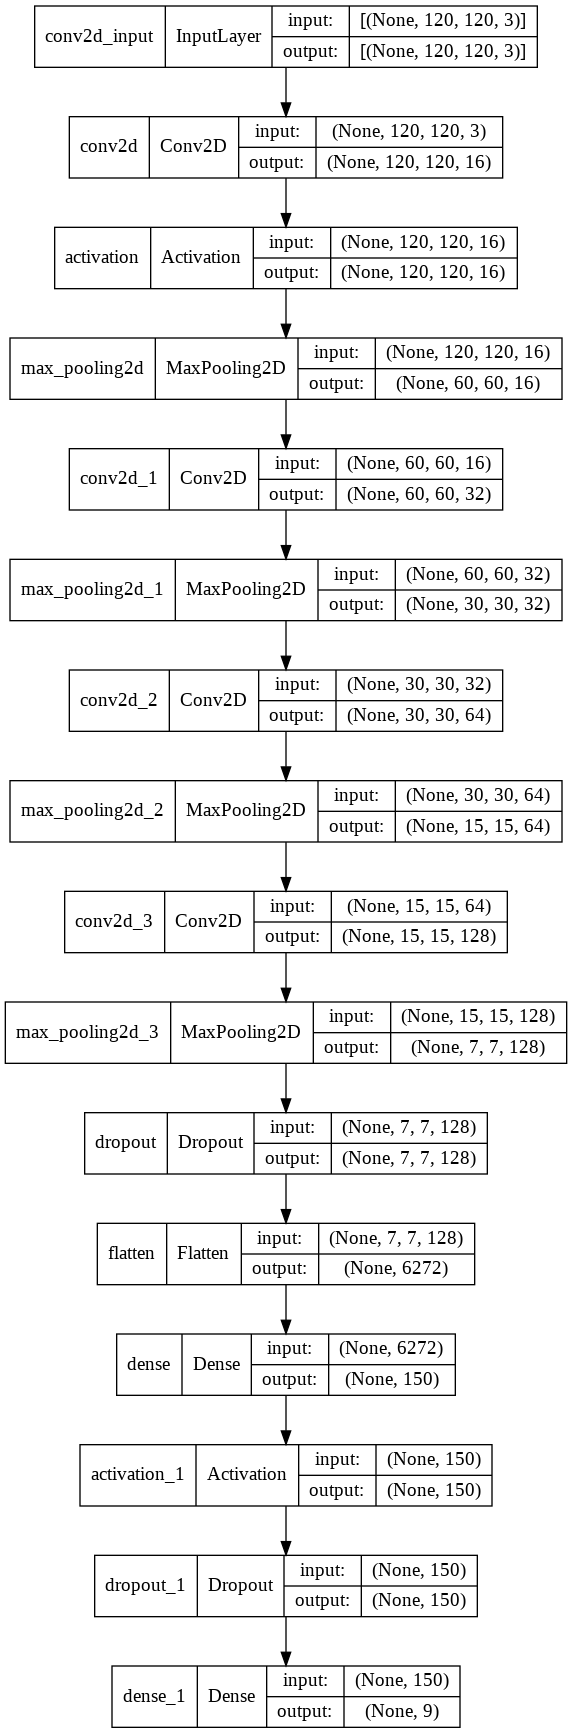

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="base_model.png", show_shapes=True, show_layer_names=True)

In [ ]:
import keras.optimizers
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
transfer_learning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
#fitting the new model


checkpointer = ModelCheckpoint(filepath = 'transfer_learning.hdf5', verbose = 1, save_best_only = True)

# running 
transfer_learning_cnn = transfer_learning_model.fit(X_train,y_train,
        batch_size = 128,
        epochs=10,
        validation_data=(X_test, y_test),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 193.04788, saving model to transfer_learning.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


11/11 - 568s - loss: 4.2262 - accuracy: 0.5637 - val_loss: 193.0479 - val_accuracy: 0.0794 - 568s/epoch - 52s/step
Epoch 2/10

Epoch 00002: val_loss improved from 193.04788 to 62.96125, saving model to transfer_learning.hdf5
11/11 - 555s - loss: 0.4191 - accuracy: 0.8762 - val_loss: 62.9613 - val_accuracy: 0.2147 - 555s/epoch - 50s/step
Epoch 3/10

Epoch 00003: val_loss did not improve from 62.96125
11/11 - 546s - loss: 0.0999 - accuracy: 0.9639 - val_loss: 84.7497 - val_accuracy: 0.1559 - 546s/epoch - 50s/step
Epoch 4/10

Epoch 00004: val_loss did not improve from 62.96125
11/11 - 548s - loss: 0.0547 - accuracy: 0.9845 - val_loss: 110.2661 - val_accuracy: 0.1559 - 548s/epoch - 50s/step
Epoch 5/10

Epoch 00005: val_loss did not improve from 62.96125
11/11 - 561s - loss: 0.0215 - accuracy: 0.9926 - val_loss: 85.5630 - val_accuracy: 0.1559 - 561s/epoch - 51s/step
Epoch 6/10

Epoch 00006: val_loss did not improve from 62.96125
11/11 - 548s - loss: 0.0240 - accuracy: 0.9926 - val_loss: 74.

In [ ]:
import keras.optimizers
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
transfer_learning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
#fitting the new model


checkpointer = ModelCheckpoint(filepath = 'transfer_learning.hdf5', verbose = 1, save_best_only = True)

# running 
transfer_learning_cnn = transfer_learning_model.fit(X_train,y_train,
        batch_size = 128,
        epochs=10,
        validation_data=(X_test, y_test),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 31670.80078, saving model to transfer_learning.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


11/11 - 574s - loss: 0.6834 - accuracy: 0.9285 - recall_1: 0.8865 - precision_1: 0.9458 - auc_1: 0.9858 - true_positives_1: 1203.0000 - true_negatives_1: 10787.0000 - false_negatives_1: 154.0000 - false_positives_1: 69.0000 - val_loss: 31670.8008 - val_accuracy: 0.2412 - val_recall_1: 0.2412 - val_precision_1: 0.2412 - val_auc_1: 0.5732 - val_true_positives_1: 82.0000 - val_true_negatives_1: 2462.0000 - val_false_negatives_1: 258.0000 - val_false_positives_1: 258.0000 - 574s/epoch - 52s/step
Epoch 2/10

Epoch 00002: val_loss did not improve from 31670.80078
11/11 - 564s - loss: 0.2647 - accuracy: 0.9602 - recall_1: 0.9469 - precision_1: 0.9757 - auc_1: 0.9973 - true_positives_1: 1285.0000 - true_negatives_1: 10824.0000 - false_negatives_1: 72.0000 - false_positives_1: 32.0000 - val_loss: 1099047.8750 - val_accuracy: 0.2147 - val_recall_1: 0.2147 - val_precision_1: 0.2147 - val_auc_1: 0.5583 - val_true_positives_1: 73.0000 - val_true_negatives_1: 2453.0000 - val_false_negatives_1: 267.0

**score of the new model built using transfer learning**
**bold text**

In [ ]:
#score of the new model built using transfer learning

score = transfer_learning_model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

11/11 [==============================] - 20s 2s/step - loss: 36.8218 - accuracy: 0.0824 - recall_1: 0.0824 - precision_1: 0.0824 - auc_1: 0.4797 - true_positives_1: 28.0000 - true_negatives_1: 2408.0000 - false_negatives_1: 312.0000 - false_positives_1: 312.0000
Test accuracy: 0.08235294371843338


#**plotting curves for the transfer learning model**

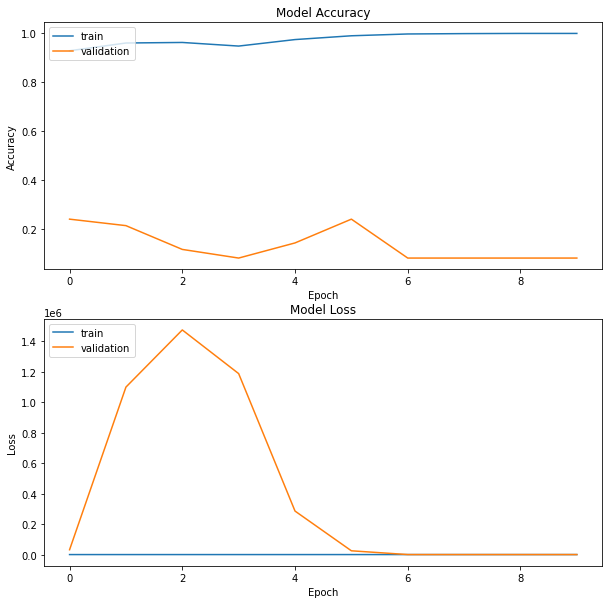

In [ ]:
#plotting curves for the transfer learning model

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(transfer_learning_cnn.history['accuracy'])  
plt.plot(transfer_learning_cnn.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(transfer_learning_cnn.history['loss'])  
plt.plot(transfer_learning_cnn.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

[](https://)**#importing vgg16**

In [ ]:
#importing vgg16

#Part 2 using transfer learning

#importing vgg16 architecture which is trained on Imagenet

from keras.applications.vgg16 import VGG16

vgg_model = VGG16(input_shape=[120,120,3], weights='imagenet', include_top=False)
#We will not train the layers imported.

for layer in vgg_model.layers:
   layer.trainable = False
  
#summary of the imported vgg model  vgg_model.summary()

**#adding some layers to the vgg_model imported and again fitting the model to check the performance**

In [ ]:
#adding some layers to the vgg_model imported and again fitting the model to check the performance

transfer_learning_model = Sequential()
 
transfer_learning_model.add(vgg_model)


transfer_learning_model.add(Conv2D(1024, kernel_size=3, padding='same'))

transfer_learning_model.add(Activation('relu'))

transfer_learning_model.add(MaxPooling2D(pool_size=(2, 2)))
transfer_learning_model.add(Dropout(0.3))

transfer_learning_model.add(Flatten())
transfer_learning_model.add(Dense(150))
transfer_learning_model.add(Activation('relu'))
transfer_learning_model.add(Dropout(0.4))
transfer_learning_model.add(Dense(9,activation = 'softmax'))
transfer_learning_model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="vgg_model.png", show_shapes=True, show_layer_names=True)

**fitting the new model**

In [ ]:
import keras.optimizers
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
transfer_learning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
#fitting the new model
checkpointer = ModelCheckpoint(filepath = 'transfer_learning.hdf5', verbose = 1, save_best_only = True)
# running 
transfer_learning_cnn = transfer_learning_model.fit(X_train,y_train,
        batch_size = 128,
        epochs=10,
        validation_data=(X_test, y_test),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

In [ ]:
import keras.optimizers
from tensorflow.keras.optimizers import Adam

optimizer = Adam()
transfer_learning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])
#fitting the new model


checkpointer = ModelCheckpoint(filepath = 'transfer_learning.hdf5', verbose = 1, save_best_only = True)

# running 
transfer_learning_cnn = transfer_learning_model.fit(X_train,y_train,
        batch_size = 128,
        epochs=10,
        validation_data=(X_test, y_test),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)


**score of the new model built using transfer learning**

In [ ]:
#score of the new model built using transfer learning

score = transfer_learning_model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

**plotting curves for the transfer learning model**

In [ ]:
#plotting curves for the transfer learning model

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(transfer_learning_cnn.history['accuracy'])  
plt.plot(transfer_learning_cnn.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(transfer_learning_cnn.history['loss'])  
plt.plot(transfer_learning_cnn.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [ ]:
y_pred = transfer_learning_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=-1)
t_true=np.argmax(y_test,axis=-1)
b=confusion_matrix(t_true, y_pred,labels=output_lebel)
sns.heatmap(b,annot=True,cmap="YlGnBu")

In [ ]:
#y_pred=np.round(model.predict(X_test),0)
#X_pred=np.round(model.predict(X_train),0)
#print('round test_tables',y_pred)
#print('round test_tables',X_pred)


In [ ]:
#output=['Baseball','BasketBall' ,'Fighting','Football playing','Hospital','Eatting','Skating','walking','working']
#classification_metrics=metrics.classification_report(X_pred,y_pred,target_names=output)

In [ ]:
#acc = accuracy_score(y_test, y_pred)
#prec = precision_score(y_test, y_pred)
#rec = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)